# Email Spam Classification System

Introduction

This document outlines the implementation of a machine learning-based email spam classification system using Python. The system uses a dataset of emails to train a Naive Bayes model for spam detection. It provides functionalities to preprocess email content, train the model, evaluate its performance, and make predictions.

Prerequisites:

To run this implementation, ensure the following libraries are installed:

-kagglehub

-pandas

-numpy

-scikit-learn

-nltk

-pickle

To install missing packages, run:

In [1]:
pip install kagglehub pandas numpy scikit-learn nltk

Note: you may need to restart the kernel to use updated packages.


In [7]:
import kagglehub
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from nltk.tokenize import SpaceTokenizer 
import pickle
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

The dataset used is the Email Spam Classification Dataset available on Kaggle. It contains email content along with labels indicating whether an email is spam or not. The dataset is downloaded programmatically using kagglehub.

In [3]:
path = kagglehub.dataset_download("balaka18/email-spam-classification-dataset-csv")
data = pd.read_csv(path+'/emails.csv')

In [4]:
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


The data is split into training and testing sets. A Naive Bayes model (MultinomialNB) is trained on the training data and the trained model is serialized using pickle for future use.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [6]:
data.isnull().sum().sum()

0

To find the domain of the emails, kmeans algorithms is used and with the elbow method the best k is defined.

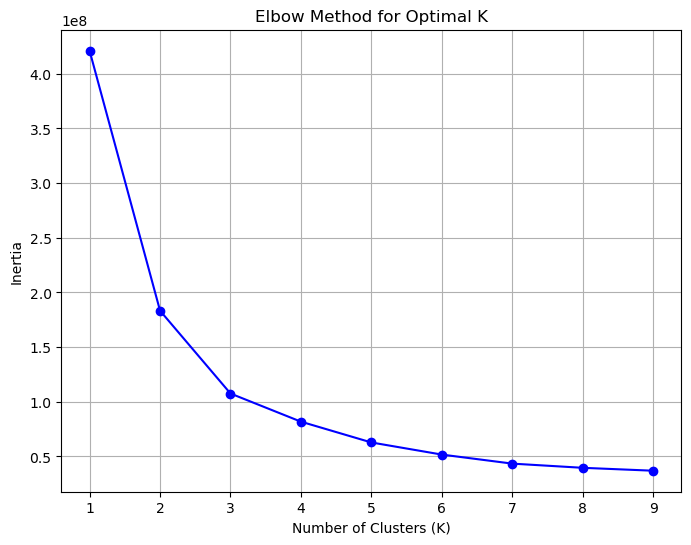

In [15]:
inertias = []

X_new = data.drop(columns=["Email No.", "Prediction"]) 

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_new)
    inertias.append(kmeans.inertia_)

deltas = np.diff(inertias) 

plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), inertias, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In this plot it appears that there is an elbow at k = 3 clusters and add the cluster number as a domain column to dataset.

In [16]:
X_new = data.drop(columns=["Email No.", "Prediction"]) 
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_new)
data['Domain'] = kmeans.labels_

Train the Naive Bayes classifier model and save it spam_model.pkl file.

In [22]:
# Prepare features (X) and labels (y)
X = data.drop(columns=["Email No.", "Prediction"])  # Drop non-feature columns
y = data["Prediction"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model on vectorized data
model = MultinomialNB()
model.fit(X_train, y_train)


# Save the trained model
with open('spam_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

The model's performance is evaluated using a confusion matrix, classification report, and F1 score.

In [23]:

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nF1 Score:", f1)

Confusion Matrix:
 [[1039   58]
 [  24  431]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96      1097
           1       0.88      0.95      0.91       455

    accuracy                           0.95      1552
   macro avg       0.93      0.95      0.94      1552
weighted avg       0.95      0.95      0.95      1552


F1 Score: 0.913135593220339


This is a function to preprocess the input email by making it lower case and tokenizing email content using NLTK's SpaceTokenizer.

In [24]:
def preprocess_email(text):

    # Basic cleaning and tokenization
    text = text.lower()  # Convert to lowercase
    tk = SpaceTokenizer() 
    tokens = tk.tokenize(text) 
    return tokens

This function is used to predict, if an input email is spam or not based on the saved model. It loads the model and then preprocess the email and create a data frame for the email to make a prediction. The data frame use the model features.

In [25]:
def predict_email(email_content):

    # Load the trained model
    with open('spam_model.pkl', 'rb') as model_file:
        model = pickle.load(model_file)

    # Preprocess the email content
    tokens = preprocess_email(email_content)

    print(tokens)

    # Count the occurrences of tokens
    token_counts = Counter(tokens)

    # Create a DataFrame with tokens as columns and their counts as values
    df = pd.DataFrame([token_counts])
    all_possible_features = model.feature_names_in_
    df = df.reindex(columns=all_possible_features, fill_value=0)
  
    print(df)
    
    # Predict spam or not
    prediction = model.predict(df)
    return "Spam" if prediction[0] == 1 else "Not Spam"

Get an email as input and predict is it spam or not.

In [26]:
if __name__ == "__main__":
    # Get email content from the user
    email_content = input("Enter the email content: ")

    # Make a prediction
    result = predict_email(email_content)

    # Output the prediction result
    print(f"The email is classified as: {result}")

Enter the email content: to the ect
['to', 'the', 'ect']
   the  to  ect  and  for  of  a  you  hou  in  ...  jay  valued  lay  \
0    1   1    1    0    0   0  0    0    0   0  ...    0       0    0   

   infrastructure  military  allowing  ff  dry  Cluster  Domain  
0               0         0         0   0    0        0       0  

[1 rows x 3002 columns]
The email is classified as: Not Spam
